In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For Classification
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB

# For Splitting, Standardizing and encoding
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

# PCA for dimentinality reduction
from sklearn.decomposition import PCA

# For accuracy
from sklearn import metrics

# For warning
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [2]:
df_train = pd.read_csv('train.csv')
print(df_train.shape)
df_train.head(10)

(108129, 14)


,project_id,name,desc,goal,keywords,disable_communication,country,currency,deadline,state_changed_at,created_at,launched_at,backers_count,final_status
0,kkst1451568084,drawing for dollars,I like drawing pictures. and then i color them...,20.0,drawing-for-dollars,False,US,USD,1241333999,1241334017,1240600507,1240602723,3,1
1,kkst1474482071,Sponsor Dereck Blackburn (Lostwars) Artist in ...,"I, Dereck Blackburn will be taking upon an inc...",300.0,sponsor-dereck-blackburn-lostwars-artist-in-re...,False,US,USD,1242429000,1242432018,1240960224,1240975592,2,0
2,kkst183622197,Mr. Squiggles,So I saw darkpony's successfully funded drawin...,30.0,mr-squiggles,False,US,USD,1243027560,1243027818,1242163613,1242164398,0,0
3,kkst597742710,Help me write my second novel.,Do your part to help out starving artists and ...,500.0,help-me-write-my-second-novel,False,US,USD,1243555740,1243556121,1240963795,1240966730,18,1
4,kkst1913131122,Support casting my sculpture in bronze,"I'm nearing completion on a sculpture, current...",2000.0,support-casting-my-sculpture-in-bronze,False,US,USD,1243769880,1243770317,1241177914,1241180541,1,0
5,kkst1085176748,daily digest,I'm a fledgling videoblogger living in Brookly...,700.0,daily-digest,False,US,USD,1243815600,1243816219,1241050799,1241464468,14,0
6,kkst1468954715,iGoozex - Free iPhone app,I am an independent iPhone developer that beli...,250.0,igoozex-free-iphone-app,False,US,USD,1243872000,1243872028,1241725172,1241736308,2,0
7,kkst194050612,Drive A Faster Car 2.0,Drive A Faster Car (http://www.driveafastercar...,1000.0,drive-a-faster-car-20,False,US,USD,1244088000,1244088022,1241460541,1241470291,32,1
8,kkst708883590,"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""...","Opening Friday, June 5 2009, on view through S...",5000.0,lostles-at-tinys-giant,False,US,USD,1244264400,1244264422,1241415164,1241480901,44,0
9,kkst890976740,Choose Your Own Adventure - A Robot Painting S...,This project is for a Choose Your Own Adventur...,3500.0,choose-your-own-adventure-a-robot-painting-series,False,US,USD,1244946540,1244946632,1242268157,1242273460,18,0


In [3]:
df_test = pd.read_csv('test.csv')
print(df_test.shape)
df_test.head(10)

(63465, 12)


,project_id,name,desc,goal,keywords,disable_communication,country,currency,deadline,state_changed_at,created_at,launched_at
0,kkst917493670,Bràthair.,"My first film, of many to come. Trying to purs...",7000.0,brathair,False,US,USD,1449619185,1449619185,1446002581,1446159585
1,kkst1664901914,THE SCREENWRITER,A young man that has earned his master's in sc...,35000.0,the-screenwriter,False,US,USD,1453435620,1453435620,1450297323,1450411620
2,kkst925125077,The Hornets Nest the Fairmont Heights Story,Film about a high school constructed for negro...,49500.0,the-hornets-nest-the-fairmont-heights-story,False,US,USD,1451780700,1451780700,1448581356,1448672128
3,kkst1427645275,BROTHERS Season 2 - Groundbreaking Transgender...,The acclaimed series about a group of transgen...,40000.0,brothers-season-2-groundbreaking-transgender-male,False,US,USD,1445021518,1445021530,1440966830,1442429518
4,kkst1714249266,Blackdom the movie,Blackdom's history offers a new narrative tha...,20000.0,blackdom-the-movie,False,US,USD,1462068840,1462068844,1455765276,1458334890
5,kkst994744324,Hero's Battle: The Movie produced by Fish4Him ...,Sexual immorality is Satan's weapon to wage wa...,10000.0,heros-battle-the-movie,False,US,USD,1461777994,1461777994,1458171626,1459185994
6,kkst366471810,Limbo Film Project - 213 lives of Julia,Film focuses on connection between social alie...,1000.0,limbo-film-project-213-lives-of-julia,False,IT,EUR,1450087423,1450087423,1446994619,1447495423
7,kkst1686645245,Traffic (A Short Film),Paris is hired by a jazz singer to kill an old...,300.0,traffic-a-short-film,False,GB,GBP,1456516800,1456516801,1450964837,1451340184
8,kkst1009612119,Modern Gangsters,new web series created by jonney terry,6000.0,modern-gangsters,False,US,USD,1444337940,1444337941,1441745957,1441750564
9,kkst774947236,KISS ME GOODBYE - A REFRESHING VOICE IN INDIE ...,A martyr faces execution at the hands of the S...,8000.0,kiss-me-goodbye-a-new-voice-in-indie-filmmaking,False,US,USD,1444144222,1444144223,1438886415,1441120222


In [4]:
df_train.columns

Index(['project_id', 'name', 'desc', 'goal', 'keywords',
       'disable_communication', 'country', 'currency', 'deadline',
       'state_changed_at', 'created_at', 'launched_at', 'backers_count',
       'final_status'],
      dtype='object')

In [5]:
df_test.columns

Index(['project_id', 'name', 'desc', 'goal', 'keywords',
       'disable_communication', 'country', 'currency', 'deadline',
       'state_changed_at', 'created_at', 'launched_at'],
      dtype='object')

##### TRAIN DATASET

In [6]:
df_train.corr()

,goal,disable_communication,deadline,state_changed_at,created_at,launched_at,backers_count,final_status
goal,1.000000,-0.000602,0.021468,0.021179,0.020937,0.020859,0.008733,-0.018984
disable_communication,-0.000602,1.000000,0.046417,0.043782,0.048588,0.046166,-0.003294,-0.037517
deadline,0.021468,0.046417,1.000000,0.999930,0.984109,0.999674,0.005281,-0.123052
state_changed_at,0.021179,0.043782,0.999930,1.000000,0.984029,0.999641,0.005501,-0.121628
created_at,0.020937,0.048588,0.984109,0.984029,1.000000,0.984558,0.001053,-0.126394
launched_at,0.020859,0.046166,0.999674,0.999641,0.984558,1.000000,0.005357,-0.119916
backers_count,0.008733,-0.003294,0.005281,0.005501,0.001053,0.005357,1.000000,0.116764
final_status,-0.018984,-0.037517,-0.123052,-0.121628,-0.126394,-0.119916,0.116764,1.000000


In [7]:
df_train = df_train.drop(['name', 'desc', 'keywords', 'country', 'currency'], axis = 'columns')

In [8]:
df_train.head()

,project_id,goal,disable_communication,deadline,state_changed_at,created_at,launched_at,backers_count,final_status
0,kkst1451568084,20.0,False,1241333999,1241334017,1240600507,1240602723,3,1
1,kkst1474482071,300.0,False,1242429000,1242432018,1240960224,1240975592,2,0
2,kkst183622197,30.0,False,1243027560,1243027818,1242163613,1242164398,0,0
3,kkst597742710,500.0,False,1243555740,1243556121,1240963795,1240966730,18,1
4,kkst1913131122,2000.0,False,1243769880,1243770317,1241177914,1241180541,1,0


In [9]:
df_train.isnull().sum()

project_id               0
goal                     0
disable_communication    0
deadline                 0
state_changed_at         0
created_at               0
launched_at              0
backers_count            0
final_status             0
dtype: int64

In [10]:
df_train['disable_communication'].unique()

array([False,  True])

In [11]:
df_train['disable_communication'] = df_train['disable_communication'].replace({True: 1, False: 0})

In [12]:
encoder = LabelEncoder()

In [13]:
df_train['deadline'] = encoder.fit_transform(df_train['deadline'])
df_train['state_changed_at'] = encoder.fit_transform(df_train['state_changed_at'])
df_train['created_at'] = encoder.fit_transform(df_train['created_at'])
df_train['launched_at'] = encoder.fit_transform(df_train['launched_at'])

In [14]:
df_train['project_id'] = encoder.fit_transform(df_train['project_id'])

In [15]:
df_train.head()

,project_id,goal,disable_communication,deadline,state_changed_at,created_at,launched_at,backers_count,final_status
0,25452,20.0,0,0,0,1,0,3,1
1,26733,300.0,0,1,3,4,3,2,0
2,47110,30.0,0,2,4,24,20,0,0
3,85933,500.0,0,3,5,5,2,18,1
4,51484,2000.0,0,4,6,10,7,1,0


##### TEST DATASET

In [16]:
df_test.corr()

,goal,disable_communication,deadline,state_changed_at,created_at,launched_at
goal,1.000000,0.016506,-0.001759,-0.002567,-0.002588,-0.002765
disable_communication,0.016506,1.000000,-0.031726,-0.040017,-0.018401,-0.032701
deadline,-0.001759,-0.031726,1.000000,0.997380,0.814225,0.998193
state_changed_at,-0.002567,-0.040017,0.997380,1.000000,0.813101,0.996902
created_at,-0.002588,-0.018401,0.814225,0.813101,1.000000,0.816547
launched_at,-0.002765,-0.032701,0.998193,0.996902,0.816547,1.000000


In [17]:
df_test.isnull().sum()

project_id               0
name                     0
desc                     4
goal                     0
keywords                 0
disable_communication    0
country                  0
currency                 0
deadline                 0
state_changed_at         0
created_at               0
launched_at              0
dtype: int64

In [18]:
df_test.columns

Index(['project_id', 'name', 'desc', 'goal', 'keywords',
       'disable_communication', 'country', 'currency', 'deadline',
       'state_changed_at', 'created_at', 'launched_at'],
      dtype='object')

In [19]:
df_test = df_test.drop(['name', 'desc', 'keywords','country','currency'], axis = 'columns')

In [20]:
df_test['deadline'] = encoder.fit_transform(df_test['deadline'])
df_test['state_changed_at'] = encoder.fit_transform(df_test['state_changed_at'])
df_test['created_at'] = encoder.fit_transform(df_test['created_at'])
df_test['launched_at'] = encoder.fit_transform(df_test['launched_at'])
df_test['project_id'] = encoder.fit_transform(df_test['project_id'])

In [21]:
df_test['disable_communication'] = encoder.fit_transform(df_test['disable_communication'])

In [22]:
df_test.head(10)

,project_id,goal,disable_communication,deadline,state_changed_at,created_at,launched_at
0,60766,7000.0,0,20821,20999,25478,21450
1,22093,35000.0,0,24666,24847,30042,26468
2,61018,49500.0,0,23278,23407,28476,24769
3,14114,40000.0,0,15405,15571,19398,16783
4,23770,20000.0,0,33869,34117,36026,35203
5,63306,10000.0,0,33483,33735,38925,36055
6,42875,1000.0,0,21444,21613,26618,23337
7,22792,300.0,0,27449,27690,30526,26997
8,311,6000.0,0,14550,14743,20405,15830
9,56107,8000.0,0,14349,14542,16878,15038


##### DATA VISUALIZATION

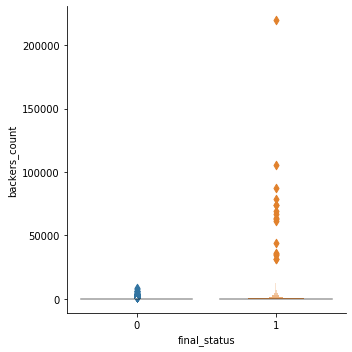

In [23]:
sns.catplot(x="final_status", y="backers_count", kind="boxen",
            data=df_train);

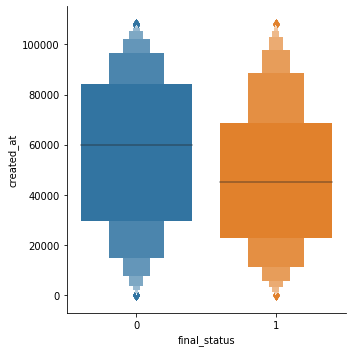

In [24]:
sns.catplot(x="final_status", y="created_at", kind="boxen",
            data=df_train);

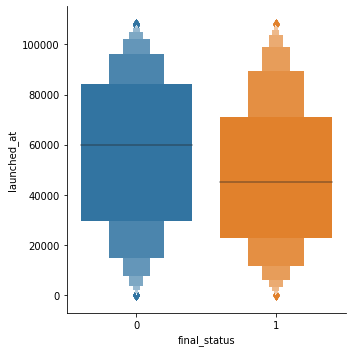

In [25]:
sns.catplot(x="final_status", y="launched_at", kind="boxen",
            data=df_train);

##### Correlation of train dataset

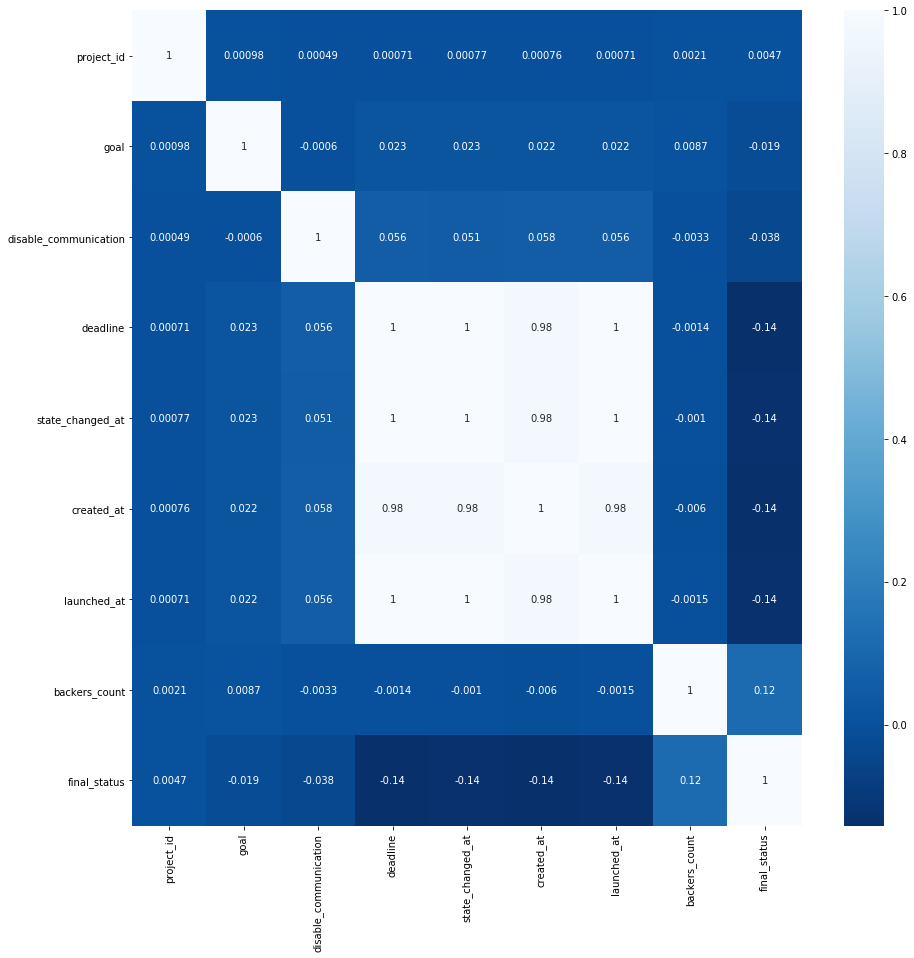

In [26]:
plt.figure(figsize = (15,15))
sns.heatmap(df_train.corr(), annot = True, cmap = 'Blues_r')

##### Correlation for test dataset

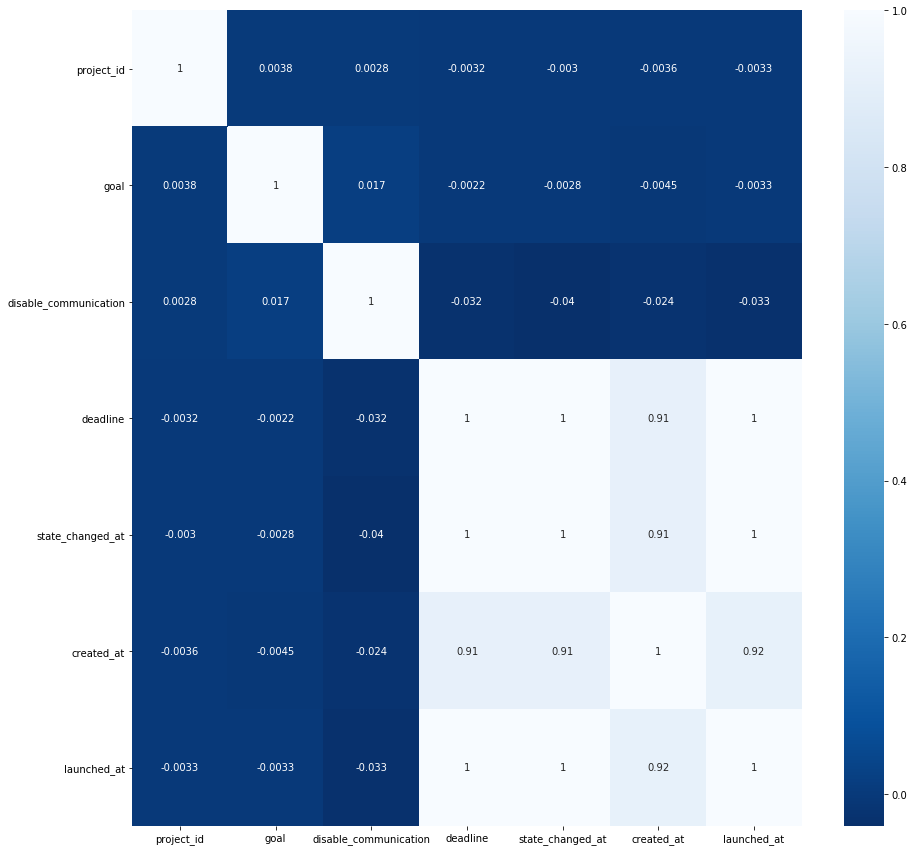

In [27]:
plt.figure(figsize = (15,15))
sns.heatmap(df_test.corr(), annot = True, cmap = 'Blues_r')

In [28]:
y = np.array(df_train['final_status'])
y = y.reshape(-1,1)

In [29]:
X = df_train.iloc[:, df_train.columns != 'final_status']

##### PCA on train dataset

In [30]:
scaler = StandardScaler()

In [31]:
df = scaler.fit_transform(X)

In [32]:
X_new = pd.DataFrame(df)

In [33]:
X_new.head(10)

,0,1,2,3,4,5,6,7
0,-0.916635,-0.037768,-0.054737,-1.728041,-1.741136,-1.732228,-1.732466,-0.102416
1,-0.875596,-0.037479,-0.054737,-1.728007,-1.741034,-1.732132,-1.732369,-0.103266
2,-0.222784,-0.037757,-0.054737,-1.727972,-1.741000,-1.731491,-1.731824,-0.104965
3,1.020979,-0.037274,-0.054737,-1.727938,-1.740966,-1.732100,-1.732401,-0.089669
4,-0.082655,-0.035730,-0.054737,-1.727904,-1.740933,-1.731939,-1.732241,-0.104115
5,-1.576785,-0.037068,-0.054737,-1.727870,-1.740899,-1.731971,-1.732145,-0.093068
6,-0.884951,-0.037531,-0.054737,-1.727835,-1.740865,-1.731651,-1.731985,-0.103266
7,-0.035497,-0.036759,-0.054737,-1.727801,-1.740831,-1.731779,-1.732113,-0.077771
8,1.217268,-0.032644,-0.054737,-1.727767,-1.740797,-1.731811,-1.732081,-0.067574
9,1.538244,-0.034187,-0.054737,-1.727732,-1.740763,-1.731427,-1.731760,-0.089669


In [34]:
pca_train = PCA(n_components = 2)

In [35]:
principalComponents = pca_train.fit_transform(X_new)

In [36]:
principalDf = pd.DataFrame(data = principalComponents, columns = ['PC1', 'PC2'])

In [37]:
principalDf.head(10)

,PC1,PC2
0,-3.467008,-0.261833
1,-3.466818,-0.254264
2,-3.465864,-0.128827
3,-3.465810,0.123666
4,-3.466127,-0.099709
5,-3.466855,-0.383124
6,-3.466222,-0.256115
7,-3.465916,-0.072957
8,-3.465203,0.180096
9,-3.464642,0.226130


In [38]:
finalDf = pd.concat([principalDf, df_train[['final_status']]], axis = 1)

In [39]:
finalDf.head()

,PC1,PC2,final_status
0,-3.467008,-0.261833,1
1,-3.466818,-0.254264,0
2,-3.465864,-0.128827,0
3,-3.465810,0.123666,1
4,-3.466127,-0.099709,0


##### PCA on test dataset

In [40]:
df_pca = scaler.fit_transform(df_test)

In [41]:
df_test_new = pd.DataFrame(df_pca)

In [42]:
df_test_new.head(10)

,0,1,2,3,4,5,6
0,1.584759,-0.023473,-0.074039,-0.517123,-0.512180,-0.340840,-0.560031
1,-0.526124,-0.000268,-0.074039,-0.294058,-0.292013,-0.091607,-0.285882
2,1.598514,0.011748,-0.074039,-0.374582,-0.374404,-0.177124,-0.378704
3,-0.961641,0.003875,-0.074039,-0.831329,-0.822747,-0.672858,-0.815004
4,-0.434589,-0.012699,-0.074039,0.239847,0.238378,0.235168,0.191339
5,1.723399,-0.020986,-0.074039,0.217454,0.216521,0.393478,0.237887
6,0.608217,-0.028445,-0.074039,-0.480980,-0.477049,-0.278586,-0.456938
7,-0.487971,-0.029025,-0.074039,-0.132605,-0.129349,-0.065177,-0.256981
8,-1.715048,-0.024301,-0.074039,-0.880931,-0.870122,-0.617867,-0.867070
9,1.330457,-0.022644,-0.074039,-0.892592,-0.881622,-0.810471,-0.910339


In [43]:
pca_test = PCA(n_components = 2)

In [44]:
principalComponents = pca_test.fit_transform(df_test_new)

In [45]:
principalDf_test = pd.DataFrame(data = principalComponents, columns = ['PC_test1', 'PC_test2'])

In [46]:
principalDf_test.head(10)

,PC_test1,PC_test2
0,0.969714,0.329170
1,0.481984,-0.193447
2,0.657444,0.362969
3,1.568876,-0.322699
4,-0.454668,-0.162883
5,-0.527382,0.393012
6,0.849256,0.074589
7,0.290870,-0.200879
8,1.615827,-0.538251
9,1.749459,0.249747


##### After applying PCA on train dataset, the dataset was divided into X_PCA and y_PCA

In [47]:
X_PCA = finalDf.iloc[:, finalDf.columns != 'final_status']

In [48]:
y_PCA = np.array(finalDf['final_status'])
y_PCA = y_PCA.reshape(-1,1)

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X_PCA, y_PCA, test_size = 0.50)

In [54]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

##### Support Vector Machines

In [55]:
svm = SVC()

In [67]:
svm.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [68]:
svm_score = svm.score(X_test, y_test)*100
svm_score

69.46453343198003

##### Random Forest Classifier

In [56]:
rfc = RandomForestClassifier()

In [57]:
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [58]:
rfc_score = rfc.score(X_test, y_test)*100
rfc_score

65.63580874872838

##### Adaboost Classifier

In [59]:
ada = AdaBoostClassifier()

In [60]:
ada.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=None)

In [61]:
ada_score = ada.score(X_test, y_test)*100
ada_score

70.69083510589105

##### Naive bayes

In [62]:
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [63]:
NB_score = nb.score(X_test, y_test)*100
NB_score

68.23638213261815

##### Logistic Regression

In [64]:
lr = LogisticRegression()

In [65]:
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [66]:
LR_score = lr.score(X_test, y_test)*100
LR_score

69.10015721816333

In [69]:
models = pd.DataFrame({ 
    'Model': ['Random Forest Classifier', 'Logistic Regression',
             'Support Vector Machines', 'Naive Bayes', 'Adaboost Classifier'],
    'Score': [rfc_score, LR_score, svm_score,
              NB_score, ada_score]})
models.sort_values(by='Score', ascending=False)

,Model,Score
4,Adaboost Classifier,70.690835
2,Support Vector Machines,69.464533
1,Logistic Regression,69.100157
3,Naive Bayes,68.236382
0,Random Forest Classifier,65.635809


##### From the above dataframe, Adaboost gives good score

##### Prediction on X_test

In [70]:
y_pred = ada.predict(X_test)

##### Final prediction on principalDf_test using Adaboost classifier

In [71]:
principalDf_test['final_status'] = ada.predict(principalDf_test)

In [72]:
principalDf_test['final_status'].head()

0    1
1    0
2    1
3    0
4    0
Name: final_status, dtype: int64

In [73]:
principalDf_test['final_status'].unique()

array([1, 0], dtype=int64)

##### Accuracy score and Classification report

In [74]:
Accuracy_score = (metrics.accuracy_score(y_test, y_pred))*100
Accuracy_score

70.69083510589105

In [75]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.98      0.82     36846
           1       0.72      0.13      0.22     17219

    accuracy                           0.71     54065
   macro avg       0.72      0.55      0.52     54065
weighted avg       0.71      0.71      0.63     54065



##### Final submission

In [76]:
final_test_df = pd.concat([df_test, principalDf_test[['final_status']]], axis = 1)

In [77]:
final_test_df.head(10)

,project_id,goal,disable_communication,deadline,state_changed_at,created_at,launched_at,final_status
0,60766,7000.0,0,20821,20999,25478,21450,1
1,22093,35000.0,0,24666,24847,30042,26468,0
2,61018,49500.0,0,23278,23407,28476,24769,1
3,14114,40000.0,0,15405,15571,19398,16783,0
4,23770,20000.0,0,33869,34117,36026,35203,0
5,63306,10000.0,0,33483,33735,38925,36055,1
6,42875,1000.0,0,21444,21613,26618,23337,0
7,22792,300.0,0,27449,27690,30526,26997,0
8,311,6000.0,0,14550,14743,20405,15830,0
9,56107,8000.0,0,14349,14542,16878,15038,0


In [78]:
final_test_df[['project_id','final_status']].to_csv('Adaboost_submit1.csv', index = False)